In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import axis as ax
import tikzplotlib
from tqdm import tqdm
import time

In [9]:
sushi = pd.read_csv('../../../2023-07/sushi3-2016/sushi3a.5000.10.order', sep=' ', header=None).to_numpy()[:,2:]
n_approved = 4
n_voters, n_cands = sushi.shape
approval = np.zeros((n_voters, n_cands))
for i in range(n_voters):
    for j in range(n_approved):
        approval[i, sushi[i,j]-1] = 1

In [11]:
print("VD")
axis_vd = ax.get_axis(approval, ax.voter_deletion)
print("BC")
axis_bc = ax.get_axis(approval, ax.ballot_completion)
print("MS")
axis_ms = ax.get_axis(approval, ax.minimal_swaps)
print("FT")
axis_ft = ax.get_axis(approval, ax.forbidden_triples)

VD
BC
MS
FT


In [27]:
sushi_infos = pd.read_csv('../../../2023-07/sushi3-2016/sushi3.idata', sep='\t', header=None).to_numpy()[:,1:]
ids = [0,1,2,3,4,6,7,8,26,29]
sushi_infos = sushi_infos[ids]
cands_name = [s[0] for s in sushi_infos]
print ("Voter Deletion")
ax.print_order(axis_vd[0][0], cands_name)
print(axis_vd[0][1],len(axis_vd))
print ("Ballot Completion")
ax.print_order(axis_bc[0][0], cands_name)
print(axis_bc[0][1],len(axis_bc))
print ("Minimal Swaps")
ax.print_order(axis_ms[0][0], cands_name)
print(axis_ms[0][1],len(axis_ms))
print ("Forbidden Triples")
ax.print_order(axis_ft[0][0], cands_name)
print(axis_ft[0][1],len(axis_ft))

for i in range(n_cands):
    print(cands_name[i], approval[:,i].sum())


Voter Deletion
tekka_maki < ikura < maguro < kappa_maki < ebi < ika < tamago < uni < anago < toro
4024.0 2
Ballot Completion
tekka_maki < ikura < maguro < kappa_maki < ebi < tamago < anago < uni < ika < toro
10259.0 1
Minimal Swaps
tekka_maki < ikura < maguro < kappa_maki < ebi < anago < tamago < uni < ika < toro
12673.0 1
Forbidden Triples
tekka_maki < ikura < maguro < kappa_maki < ebi < anago < tamago < uni < ika < toro
33201.0 1
ebi 2193.0
anago 2711.0
maguro 1516.0
ika 2255.0
uni 2421.0
ikura 999.0
tamago 3810.0
toro 1389.0
tekka_maki 395.0
kappa_maki 2311.0


In [28]:

print ("Maki style")
ax.print_order(axis_vd[0][0], [str(1-s[1]) for s in sushi_infos])
print ("Seafood")
ax.print_order(axis_vd[0][0], [str(1-s[2]) for s in sushi_infos])
print ("Group")
ax.print_order(axis_vd[0][0], [str(s[3]) for s in sushi_infos])
ax.print_order(axis_vd[0][0], [str(s[4])[:3] for s in sushi_infos])
ax.print_order(axis_vd[0][0], [str(s[5])[:3] for s in sushi_infos])
ax.print_order(axis_vd[0][0], [str(s[6])[:3] for s in sushi_infos])
ax.print_order(axis_vd[0][0], [str(s[7])[:4] for s in sushi_infos])

Maki style
1 < 0 < 0 < 1 < 0 < 0 < 0 < 0 < 0 < 0
Seafood
1 < 1 < 1 < 0 < 1 < 1 < 0 < 1 < 1 < 1
Group
1 < 7 < 1 < 11 < 6 < 5 < 9 < 8 < 3 < 1
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 2.6 < 2.3 < 0.8 < 0.9 < 0.5
1.8 < 1.9 < 2.3 < 1.4 < 2.1 < 2.0 < 1.8 < 1.6 < 1.9 < 2.0
1.5 < 2.6 < 1.8 < 1.0 < 1.8 < 1.5 < 1.0 < 3.2 < 1.9 < 4.4
0.44 < 0.88 < 0.88 < 0.4 < 0.84 < 0.92 < 0.84 < 0.88 < 0.88 < 0.8


In [32]:
for n_approved in range(2,7):
    n_voters, n_cands = sushi.shape
    approval = np.zeros((n_voters, n_cands))
    for i in range(n_voters):
        for j in range(n_approved):
            approval[i, sushi[i,j]-1] = 1

    print("VD", n_approved)
    axis_vd = ax.get_axis(approval, ax.voter_deletion)
    ax.print_order(axis_vd[0][0], cands_name)
    print(axis_vd[0][1],len(axis_vd))
    ax.print_order(axis_vd[0][0], [str(s[4])[:3] for s in sushi_infos])

VD 2
tekka_maki < ikura < maguro < kappa_maki < ebi < uni < ika < tamago < anago < toro
2877.0 1
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 0.8 < 2.6 < 2.3 < 0.9 < 0.5
VD 3
tekka_maki < ikura < maguro < kappa_maki < ebi < ika < uni < tamago < anago < toro
3739.0 1
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 2.6 < 0.8 < 2.3 < 0.9 < 0.5
VD 4
tekka_maki < ikura < maguro < kappa_maki < ebi < ika < tamago < uni < anago < toro
4024.0 2
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 2.6 < 2.3 < 0.8 < 0.9 < 0.5
VD 5
tekka_maki < maguro < toro < kappa_maki < anago < tamago < uni < ika < ebi < ikura
4183.0 1
2.2 < 1.7 < 0.5 < 3.7 < 0.9 < 2.3 < 0.8 < 2.6 < 2.7 < 1.2
VD 6
tekka_maki < ikura < toro < ebi < anago < tamago < uni < ika < kappa_maki < maguro
4132.0 2
2.2 < 1.2 < 0.5 < 2.7 < 0.9 < 2.3 < 0.8 < 2.6 < 3.7 < 1.7


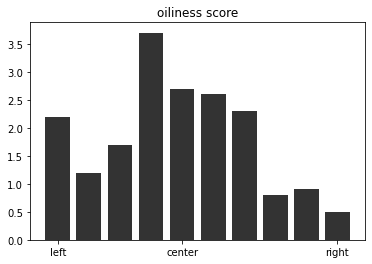

In [56]:
plt.bar(range(10),[2.2,1.2,1.7 ,3.7, 2.7, 2.6, 2.3, 0.8 ,0.9 ,0.5],color="k", alpha=0.8)
plt.xticks([0,4,9],["left", "center", "right"])
plt.title("oiliness score")
tikzplotlib.save("sushi_oiliness.tex")
plt.show()

In [40]:
n_approved= 4
n_voters, n_cands = sushi.shape
approval = np.zeros((n_voters, n_cands))
for i in range(n_voters):
    for j in range(n_approved):
        approval[i, sushi[i,j]-1] = 1



axis_vd = ax.get_axis(approval, ax.voter_deletion)

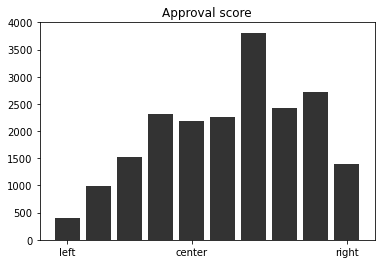

In [53]:

plt.bar(range(10),[approval[:,i].sum() for i in axis_vd[0][0]],color='k', alpha=0.8)
plt.title("Approval score")
plt.xticks([0,4,9],["left", "center", "right"])
tikzplotlib.save("sushi_approval.tex")
plt.show()

In [42]:
for n_approved in range(2,7):
    n_voters, n_cands = sushi.shape
    approval = np.zeros((n_voters, n_cands))
    for i in range(n_voters):
        for j in range(n_approved):
            approval[i, sushi[i,j]-1] = 1

    print("BC", n_approved)
    axis_bc = ax.get_axis(approval, ax.ballot_completion)
    ax.print_order(axis_bc[0][0], cands_name)
    print(axis_bc[0][1],len(axis_bc))
    ax.print_order(axis_bc[0][0], [str(s[4])[:3] for s in sushi_infos])

BC 2
tekka_maki < ikura < maguro < kappa_maki < ebi < anago < tamago < ika < uni < toro
6569.0 1
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 0.9 < 2.3 < 2.6 < 0.8 < 0.5
BC 3
tekka_maki < ikura < maguro < kappa_maki < ebi < anago < tamago < ika < uni < toro
9330.0 1
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 0.9 < 2.3 < 2.6 < 0.8 < 0.5
BC 4
tekka_maki < ikura < maguro < kappa_maki < ebi < tamago < anago < uni < ika < toro
10259.0 1
2.2 < 1.2 < 1.7 < 3.7 < 2.7 < 2.3 < 0.9 < 0.8 < 2.6 < 0.5
BC 5
tekka_maki < ikura < toro < maguro < kappa_maki < anago < tamago < ebi < uni < ika
10122.0 1
2.2 < 1.2 < 0.5 < 1.7 < 3.7 < 0.9 < 2.3 < 2.7 < 0.8 < 2.6
BC 6
tekka_maki < ikura < toro < maguro < kappa_maki < anago < tamago < ebi < uni < ika
8602.0 2
2.2 < 1.2 < 0.5 < 1.7 < 3.7 < 0.9 < 2.3 < 2.7 < 0.8 < 2.6


In [48]:
n_approved= 4
n_voters, n_cands = sushi.shape
approval = np.zeros((n_voters, n_cands))
for i in range(n_voters):
    for j in range(n_approved):
        approval[i, sushi[i,j]-1] = 1
        

scores = ax.compute_scores(approval)
axis_vd_th = ax.get_axis(approval, ax.create_voter_deletion_alpha(scores))
ax.print_order(axis_vd_th[0][0], cands_name)
print(axis_vd_th[0][1],len(axis_bc))
ax.print_order(axis_vd_th[0][0], [str(s[4])[:3] for s in sushi_infos])

uni < ika < ebi < toro < tamago < anago < tekka_maki < ikura < kappa_maki < maguro
3176.0 2
0.8 < 2.6 < 2.7 < 0.5 < 2.3 < 0.9 < 2.2 < 1.2 < 3.7 < 1.7


In [49]:
n_approved= 4
n_voters, n_cands = sushi.shape
approval = np.zeros((n_voters, n_cands))
for i in range(n_voters):
    for j in range(n_approved):
        approval[i, sushi[i,j]-1] = 1
        

scores = ax.compute_scores(approval)
axis_vd_th = ax.get_axis(approval, ax.create_ballot_completion_alpha(scores))
ax.print_order(axis_vd_th[0][0], cands_name)
print(axis_vd_th[0][1],len(axis_bc))
ax.print_order(axis_vd_th[0][0], [str(s[4])[:3] for s in sushi_infos])

ika < uni < ebi < tamago < ikura < tekka_maki < toro < anago < maguro < kappa_maki
6387.0 2
2.6 < 0.8 < 2.7 < 2.3 < 1.2 < 2.2 < 0.5 < 0.9 < 1.7 < 3.7
